# **1. Perkenalan Dataset**


Proyek ini menggunakan dataset **[Bank Customer Churn Prediction](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset)** dari situs Kaggle, yang berisi data dari **10.000** nasabah bank. Dataset tersebut mencakup informasi demografis, perilaku keuangan, serta indikator keterlibatan nasabah terhadap layanan bank. Setiap fiturnya memberikan gambaran mengenai faktor-faktor yang dapat memengaruhi keputusan nasabah bank untuk tetap menggunakan atau meninggalkan layanan berdasarkan profil dan perilaku mereka.

Dataset ini ditujukan untuk Bank Multistate ABC dengan fitur-fitur sebagai berikut:

| **No.** | **Nama Fitur**   | **Deskripsi**                                                                       |
| ------ | ---------------- | ----------------------------------------------------------------------------------- |
| 1      | customer_id      | Identitas unik untuk setiap nasabah                                                 |
| 2      | credit_score     | Skor kredit nasabah                                                                 |
| 3      | country          | Negara tempat tinggal nasabah                                                       |
| 4      | gender           | Jenis kelamin nasabah                                                               |
| 5      | age              | Usia nasabah                                                                        |
| 6      | tenure           | Lama nasabah menjadi pelanggan bank (dalam tahun)                                   |
| 7      | balance          | Saldo rekening nasabah                                                              |
| 8      | products_number  | Jumlah produk bank yang digunakan nasabah                                           |
| 9      | credit_card      | Kepemilikan kartu kredit nasabah (1: Ya, 0: Tidak)                                  |
| 10     | active_member    | Status keaktifan nasabah (1: Aktif, 0: Tidak aktif)                                 |
| 11     | estimated_salary | Perkiraan pendapatan tahunan nasabah                                                |
| 12     | churn            | Label target yang menunjukkan apakah nasabah (1: Churn) atau (0: Tidak Churn) |

**Tujuannya adalah untuk memprediksi *Customer Churn* pada Bank ABC.**

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Mengimpor library umum yang sering digunakan
import csv
import zipfile

# Mengimpor library untuk komputasi dan manipulasi data
import pandas as pd
import numpy as np

# Mengimpor library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Mengimpor library untuk data prepocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Mendownload dataset dari situs Kaggle
#!/bin/bash
!curl -L -o bank-customer-churn-dataset.zip\
  'https://www.kaggle.com/api/v1/datasets/download/gauravtopre/bank-customer-churn-dataset'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  187k  100  187k    0     0   120k      0  0:00:01  0:00:01 --:--:--  335k


In [3]:
# Unzip file dataset yang telah didownload
with zipfile.ZipFile('/content/bank-customer-churn-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [4]:
# Membaca file CSV dataset
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [5]:
# Menampilkan jumlah baris dan kolom dataset
df.shape

(10000, 12)

In [6]:
# Menampilkan 5 sample acak pada dataset
df.sample(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
5924,15674368,738,France,Female,39,1,94435.45,2,0,1,189430.86,0
6710,15701037,578,France,Male,39,2,0.00,2,1,0,70563.90,0
4586,15664895,602,France,Female,25,0,0.00,2,1,1,101274.17,0
5360,15661349,633,France,Male,35,10,0.00,2,1,0,65675.47,0
798,15570134,683,France,Female,35,6,187530.66,2,1,1,37976.36,0


In [7]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
# Menghitung jumlah nilai unik pada setiap kolom
df.nunique()

,0
customer_id,10000
credit_score,460
country,3
gender,2
age,70
tenure,11
balance,6382
products_number,4
credit_card,2
active_member,2


In [9]:
# Menampilkan ringkasan statistik kolom numerik
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# Menampilkan ringkasan statistik kolom kategorikal
df.describe(include='object')

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **Mengecek Missing Value dan Duplikat Data**

In [11]:
# Mengecek dataset menggunakan isnull().sum()
print("Jumlah data dengan missing value:")
print(df.isnull().sum())

Jumlah data dengan missing value:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [12]:
# Mengecek dataset menggunakan duplicated().sum()
print("Jumlah duplikasi data:", df.duplicated().sum())

Jumlah duplikasi data: 0


## **Distribusi Label Traget**

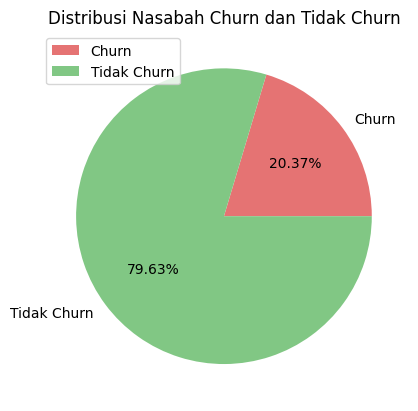

In [13]:
sizes = [df.churn[df['churn'] == 1].count(),
         df.churn[df['churn'] == 0].count()]

labels = ['Churn', 'Tidak Churn']
colors = ['#E57373', '#81C784']  # Soft Red & Soft Green

plt.pie(
    sizes,
    labels=labels,
    autopct='%.2f%%',
    colors=colors
)
plt.legend(loc='upper left')
plt.title("Distribusi Nasabah Churn dan Tidak Churn")
plt.show()

## **Mengetahui Kolerasi Antar Fitur Numerik**

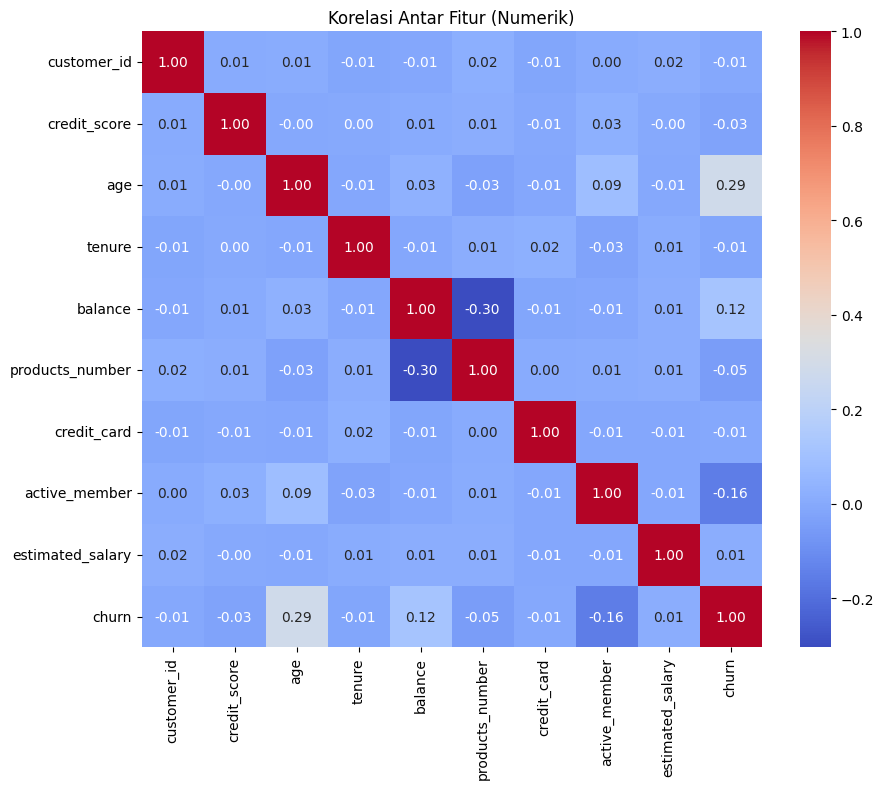

In [14]:
# Mengambil hanya kolom numerik
num_cols = df.select_dtypes(include=['number']).columns

correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Korelasi Antar Fitur (Numerik)')
plt.show()

## **Univariate Analysis**

### 1) Distribusi Fitur Numerikal

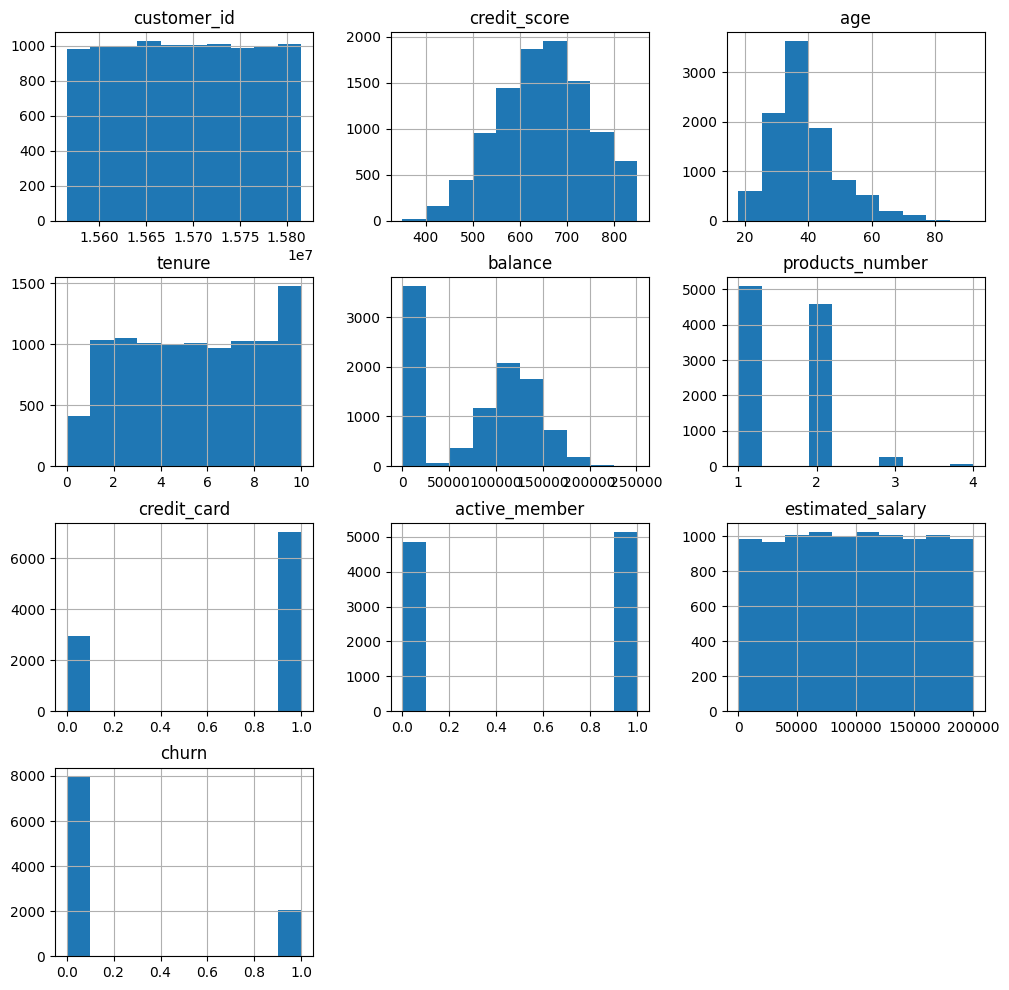

In [15]:
df.hist(figsize=(12, 12))
plt.show()

### 2) Distribusi Fitur Kategorikal

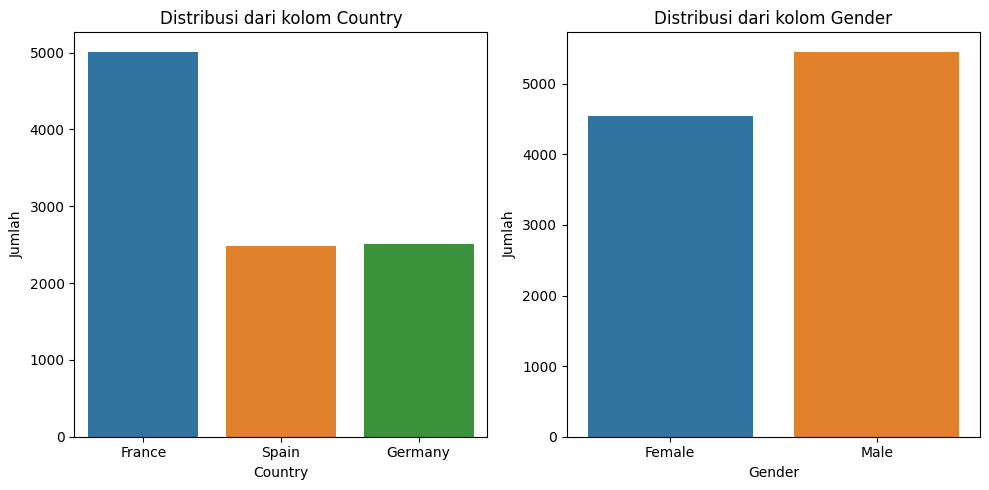

In [16]:
# Mengambil hanya kolom kategorikal
cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(10, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, len(cat_cols), i)
    sns.countplot(
        data=df,
        x=col,
        hue=col,
        legend=False
    )
    plt.title(f'Distribusi dari kolom {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

## **Multivariate Analysis**

### 1) Distribusi Status Churn berdasarkan Gender

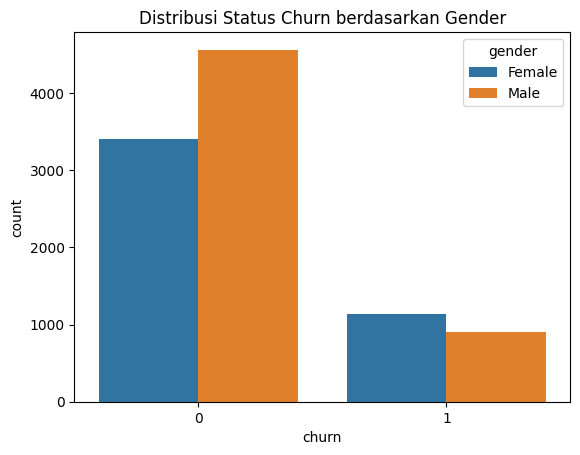

In [17]:
sns.countplot( data=df, x="churn", hue="gender")
plt.title('Distribusi Status Churn berdasarkan Gender')
plt.show()

### 2) Distribusi Umur berdasarkan Churn

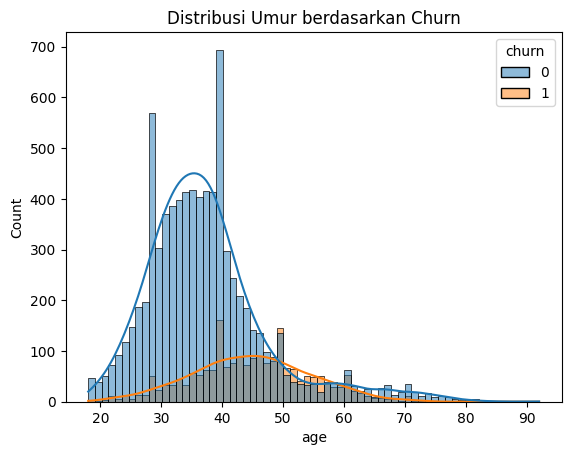

In [18]:
sns.histplot(data=df, x='age', hue='churn', kde=True)
plt.title('Distribusi Umur berdasarkan Churn')
plt.show()

### 3) Hubungan Age, Balance, Active Member terhadap Churn

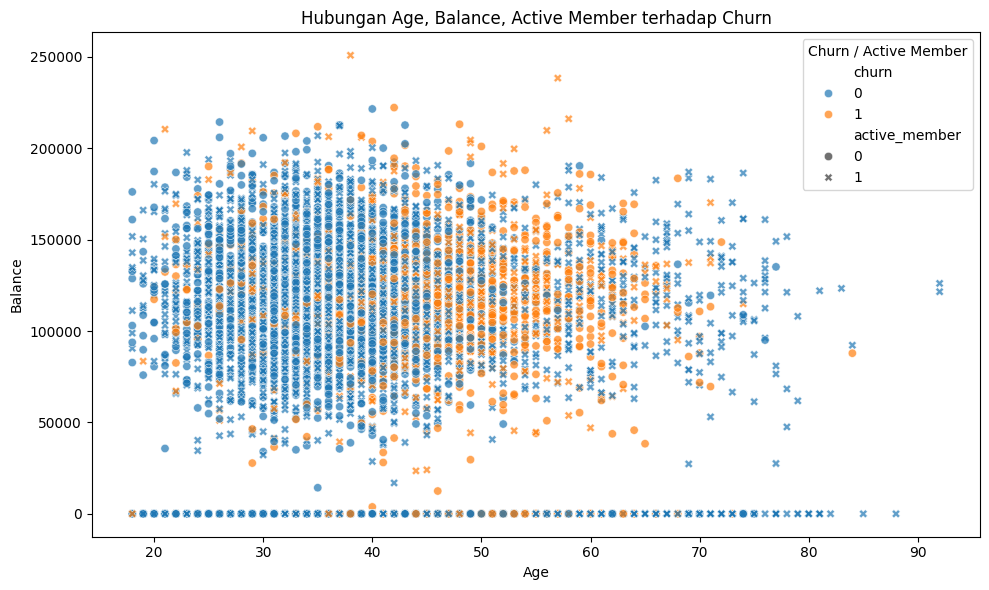

In [19]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='age',
    y='balance',
    hue='churn',
    style='active_member',
    alpha=0.7
)

plt.title('Hubungan Age, Balance, Active Member terhadap Churn')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Churn / Active Member')

plt.tight_layout()
plt.show()

## **Visualisasi Boxplot untuk Deteksi Outlier**

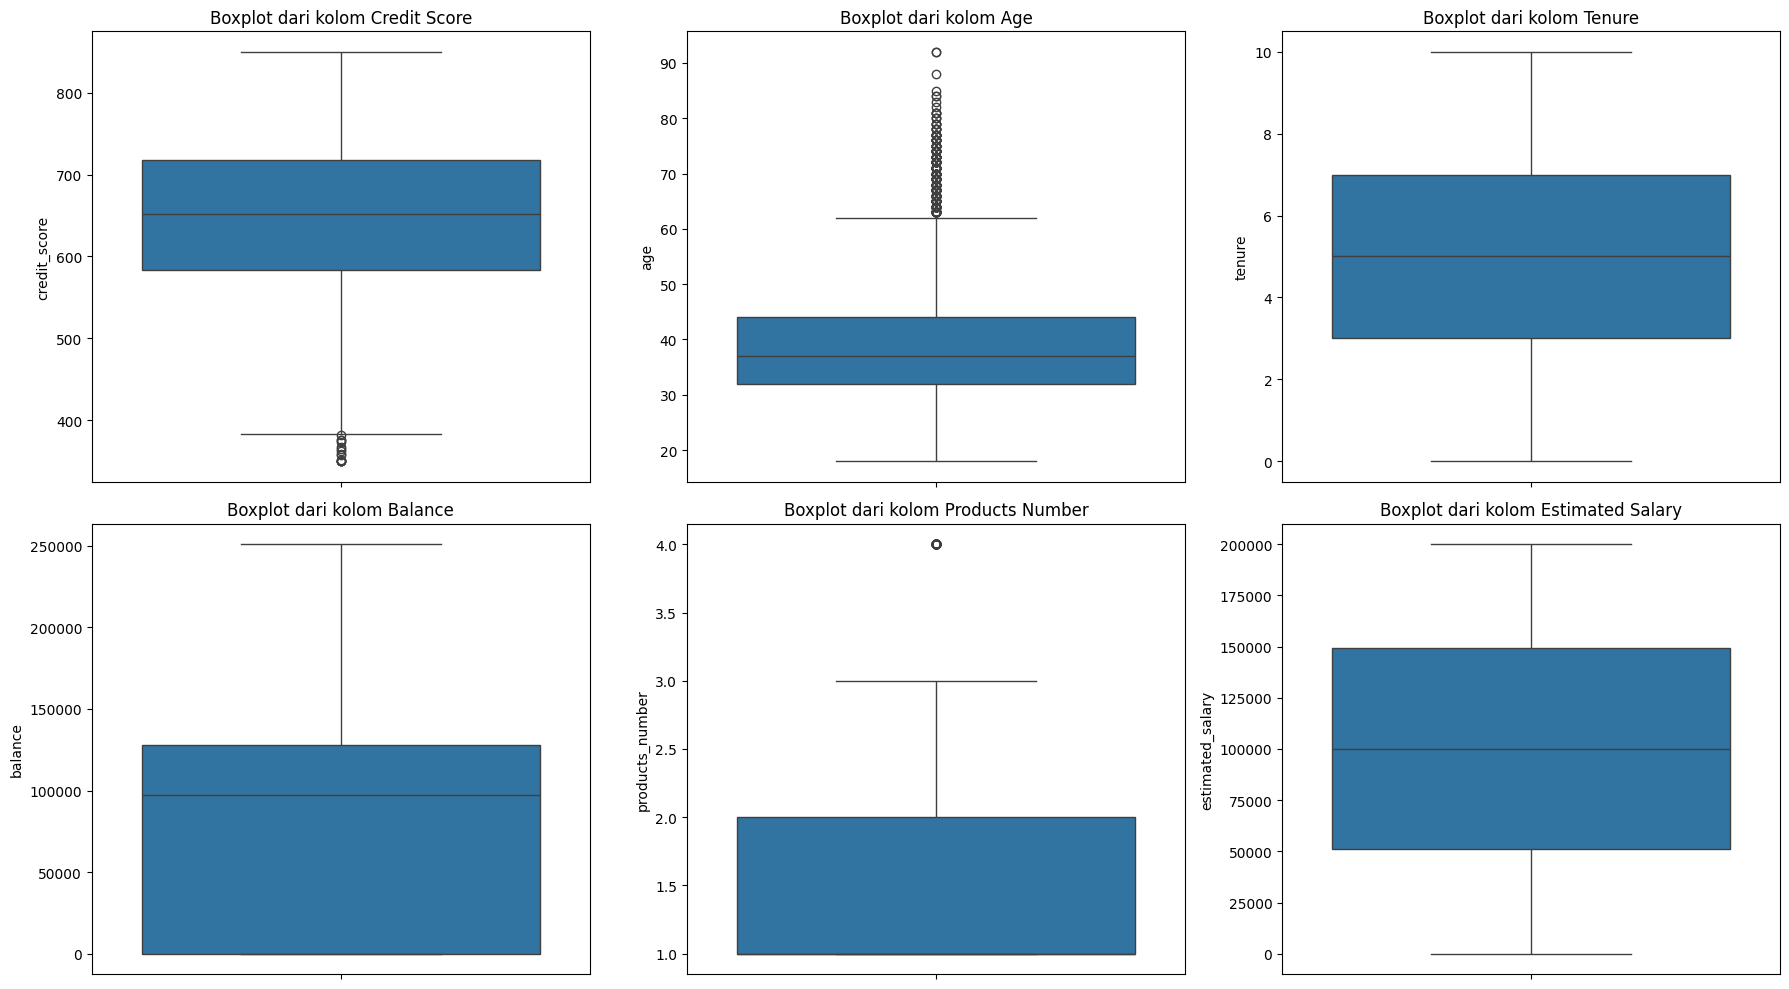

In [20]:
# Memilih hanya kolom numerik relevan untuk deteksi outlier
num_cols = ['credit_score', 'age', 'tenure', 'balance',
            'products_number', 'estimated_salary']

# Menentukan layout grid
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(
        data=df,
        y=col,
        legend=False
    )
    plt.title(f'Boxplot dari kolom {col.replace("_", " ").title()}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Insight:**

* credit_score: terdapat outlier di skor rendah (< 400)
* age: terdapat outlier di atas 60 tahun
* products_number: terdapat outlier di nilai 4 (jumlahnya cukup sediki)
* tenure, balance, estimated_salary: tidak terdapat outlier ekstrim, distribusi cukup normal

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan ya. Khususnya ketika kamu menggunakan data tidak terstruktur.

## **Menghapus Kolom yang Tidak Relevan**

In [21]:
# Drop 'customer_id' karena tidak diperlukan dalam analisis
df.drop(['customer_id'], axis=1, inplace=True)

## **Penanganan Outlier**

In [22]:
# Menangani Outlier hanya pada kolom 'credit_score', 'age', 'products_number'
outlier_cols = ['credit_score', 'age', 'products_number']

# Deteksi dan penanganan outlier dengan IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after = df.shape[0]

        print(f"{col}: Removed {before - after} outliers.")
    return df

In [23]:
# Menerapkan fungsi
df = remove_outliers_iqr(df, outlier_cols)

credit_score: Removed 15 outliers.
age: Removed 359 outliers.
products_number: Removed 58 outliers.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9568 non-null   int64  
 1   country           9568 non-null   object 
 2   gender            9568 non-null   object 
 3   age               9568 non-null   int64  
 4   tenure            9568 non-null   int64  
 5   balance           9568 non-null   float64
 6   products_number   9568 non-null   int64  
 7   credit_card       9568 non-null   int64  
 8   active_member     9568 non-null   int64  
 9   estimated_salary  9568 non-null   float64
 10  churn             9568 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 897.0+ KB


## **Menyesuaikan Data Kategorikal dan Tipe Data**

In [25]:
# Mengubah nilai kolom kategorikal menjadi numerik
df['country'] = df['country'].map({'France': 0, 'Spain' : 1, 'Germany': 2})
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Mengubah tipe data float menjadi int
df['balance'] = df['balance'].astype(int)
df['estimated_salary'] = df['estimated_salary'].astype(int)

In [26]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0,1,1,1,101348,1
1,608,1,1,41,1,83807,1,0,1,112542,0
2,502,0,1,42,8,159660,3,1,0,113931,1
3,699,0,1,39,1,0,2,0,0,93826,0
4,850,1,1,43,2,125510,1,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0,2,1,0,96270,0
9996,516,0,0,35,10,57369,1,1,1,101699,0
9997,709,0,1,36,7,0,1,0,1,42085,1
9998,772,2,0,42,3,75075,2,1,0,92888,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   credit_score      9568 non-null   int64
 1   country           9568 non-null   int64
 2   gender            9568 non-null   int64
 3   age               9568 non-null   int64
 4   tenure            9568 non-null   int64
 5   balance           9568 non-null   int64
 6   products_number   9568 non-null   int64
 7   credit_card       9568 non-null   int64
 8   active_member     9568 non-null   int64
 9   estimated_salary  9568 non-null   int64
 10  churn             9568 non-null   int64
dtypes: int64(11)
memory usage: 897.0 KB


## **Normalisasi atau Standarisasi Fitur**

In [28]:
# Memilih hanya kolom numerik
column = df.select_dtypes(include=['int64', 'float64']).columns
column = column.drop('churn')

In [29]:
# Melakukan feature scaling menggunakan StandardScalar() untuk kolom numerik
scaler = StandardScaler()
df[column] = scaler.fit_transform(df[column])

In [30]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.329808,-0.902429,1.099400,0.485534,-1.044203,-1.224650,-0.938614,0.646616,0.992711,0.021806,1
1,-0.444286,0.302153,1.099400,0.371671,-1.390497,0.118137,-0.938614,-1.546514,0.992711,0.216417,0
2,-1.547436,-0.902429,1.099400,0.485534,1.033562,1.333483,2.699489,0.646616,-1.007343,0.240565,1
3,0.502758,-0.902429,1.099400,0.143947,-1.390497,-1.224650,0.880438,-1.546514,-1.007343,-0.108966,0
4,2.074226,0.302153,1.099400,0.599396,-1.044203,0.786318,-0.938614,0.646616,0.992711,-0.365259,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.252067,-0.902429,-0.909587,0.143947,-0.005320,-1.224650,0.880438,0.646616,-1.007343,-0.066476,0
9996,-1.401737,-0.902429,-0.909587,-0.311503,1.726151,-0.305462,-0.938614,0.646616,0.992711,0.027909,0
9997,0.606829,-0.902429,1.099400,-0.197641,0.687268,-1.224650,-0.938614,-1.546514,0.992711,-1.008497,1
9998,1.262474,1.506735,-0.909587,0.485534,-0.697909,-0.021770,0.880438,0.646616,-1.007343,-0.125273,1


## **Menyimpan Data Hasil Preprocessing**

In [31]:
# Menyimpan dataset yang telah diproses dalam format CSV
df.to_csv("preprocessed_Bank_Customer_Churn_Prediction.csv", index=False)